In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import plotly.express as px 
import requests
import tweepy 
import json 
import time 
import re

# I- Gather

## 1- Twitter enhanced archive

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.shape

(2356, 17)

## 2- Images predictions - url request

In [ ]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
respone = requests.get(url)

In [ ]:
with open(url.split('/')[7],mode='wb') as file:
    file.write(respone.content)

In [3]:
df_predictions = pd.read_csv('image_predictions.tsv',sep='\t')
df_predictions.shape

(2075, 12)

## 3- API twitter - retweet and favorite

In [ ]:
API_KEY = 'HIDDEN'
SECRET_KEY = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [ ]:
auth = tweepy.OAuthHandler(API_KEY,SECRET_KEY)
auth.set_access_token(access_token,access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
tweet_ids_list = list(df_archive.tweet_id)

In [ ]:
fails_dict = {}

start = time.time()
with open('text_json.txt','w+') as file :
    for id in tweet_ids_list:
        try:
            tweet = api.get_status(id,tweet_mode='extended')
            #outputing json string from a dict
            file.writelines(json.dumps(tweet._json))
            file.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[id] = e
            pass
end = time.time()
print(end - start)
print(fails_dict)      

In [ ]:
df3_list = []

with open('text_json.txt',encoding='utf-8') as file:
    for line in file:
        
        twitter_dict = json.loads(line)
        tweet_id = twitter_dict['id']
        retweet_count = twitter_dict['retweet_count']
        like_count = twitter_dict['favorite_count']
        df3_list.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'like_count':like_count})
    

In [ ]:
df_tweets = pd.DataFrame(df3_list,columns = ['tweet_id','retweet_count','like_count'])
df_tweets.info()

# II- Assess

### Archive table

In [5]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
732,781524693396357120,NaN,NaN,2016-09-29 16:03:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Idk why this keeps happening. We only rate dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781524693...,12,10,None,None,None,None,None
457,818145370475810820,NaN,NaN,2017-01-08 17:20:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Autumn. Her favorite toy is a cheesebu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818145370...,11,10,Autumn,None,None,None,None
923,755955933503782912,NaN,NaN,2016-07-21 02:41:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a frustrated pupper attempting to escap...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755955933...,12,10,None,None,None,pupper,None
281,839290600511926273,NaN,NaN,2017-03-08 01:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...,8.392899e+17,41198418.0,2017-03-08 01:41:24 +0000,https://twitter.com/alexmartindawg/status/8392...,10,10,None,None,None,pupper,None
2262,667546741521195010,NaN,NaN,2015-11-20 03:35:20 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667546741...,9,10,George,None,None,None,None
2288,667176164155375616,NaN,NaN,2015-11-19 03:02:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are strange dogs. All have toupees. Long...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667176164...,4,10,None,None,None,None,None
1775,678021115718029313,NaN,NaN,2015-12-19 01:16:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reese. He likes holding hands. 12/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678021115...,12,10,Reese,None,None,None,None
1153,725729321944506368,NaN,NaN,2016-04-28 16:52:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She's a Butternut Splishnsplash....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725729321...,12,10,Lola,None,None,None,None
2031,671768281401958400,NaN,NaN,2015-12-01 19:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you try to recreate the scene from Lady &...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671768281...,10,10,None,None,None,None,None
2077,670833812859932673,NaN,NaN,2015-11-29 05:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jett. He is unimpressed by flower. 7/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670833812...,7,10,Jett,None,None,None,None


In [7]:
#It looks like some columns have alot of null value, reply and retweet are not original data of the page, so they are not valid for my analysis
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
#no dupliated values for tweets
df_archive.tweet_id.duplicated().sum()
df_archive.text.duplicated().sum()

0

In [9]:
#source columns contains an useless link with the platform used for twitter
df_archive.source.sample(10)


1326    <a href="http://vine.co" rel="nofollow">Vine -...
2056    <a href="http://twitter.com/download/iphone" r...
1294    <a href="http://twitter.com/download/iphone" r...
1222    <a href="http://twitter.com/download/iphone" r...
1787    <a href="http://twitter.com/download/iphone" r...
1192    <a href="http://twitter.com/download/iphone" r...
1976    <a href="http://twitter.com/download/iphone" r...
578     <a href="http://twitter.com/download/iphone" r...
580     <a href="http://twitter.com/download/iphone" r...
1858    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [10]:
#Probably category is the best datatype for this column
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [11]:
# text contaning a link at the end of the tweet
df_archive.text.head()
df_archive.text.tail()

2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, dtype: object

In [12]:
#text of retweeted tweets contains RT @ and should be removed 
df_archive[df_archive.text.str.contains('RT @')].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [13]:
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [14]:
#datatypes for timestamp is wrong  - tweet id could be changed to object as nono numerical operation would be applied be but it is not important in the cleaning process - ratings better be floats
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
#create two new columns for date and time (tidiness)
df_archive.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

In [16]:
#look at the ratings to spot any inconsistency
df_archive.describe()
# In the denominator, the min and max should be checked. The values look good as first,sencond and third quartile are 10.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',500)

denominator: mean is logic - minimum is not(2) - max as well (170) ==> any thing more or less than 10 should be checked
3nominator: min 0 not logic  and max 1776 is not .

In [18]:
#minimum of the denominator
# should be 9/10 
df_archive[df_archive['rating_denominator'] == 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


In [19]:
#max ==> multiple dogs in picture so programmatic method => so  will clean those manually then change programmaticaly
#731156023742988288

In [20]:
df_archive[df_archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [21]:
#test the remaining ==> multiple dogs => programmaticaly
df_archive[df_archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [22]:
#Numerator check
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
#check the minimum of the numerator
df_archive[df_archive['rating_numerator'] == 0]
#second record is a reply will be dropped

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


In [24]:
# nominator max
df_archive[df_archive['rating_numerator'] == 1776]
#no problem as rating marhces the text(independence day)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


In [25]:
#now check the ratings under 10.

In [26]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [27]:
#check for rating 1
df_archive[df_archive['rating_numerator'] == 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376133427200/photo/1,1,10,None,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437142401025/photo/1,1,10,None,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055577362432/photo/1,1,10,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None


In [28]:
#check for rating 2
df_archive[df_archive['rating_numerator'] == 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1761,678675843183484930,NaN,NaN,2015-12-20 20:38:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678675843183484930/photo/1,2,10,None,None,None,None,None
1764,678424312106393600,NaN,NaN,2015-12-20 03:58:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678424312106393600/photo/1,2,10,Crystal,None,None,None,None
1920,674265582246694913,NaN,NaN,2015-12-08 16:33:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Henry. He's a shit dog. Short pointy ears. Leaves trail of pee. Not fluffy. Doesn't come when called. 2/10 https://t.co/Pu9RhfHDEQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674265582246694913/photo/1,2,10,Henry,None,None,None,None
2079,670826280409919488,NaN,NaN,2015-11-29 04:47:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670826280409919488/photo/1,2,10,None,None,None,None,None
2237,668142349051129856,NaN,NaN,2015-11-21 19:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10 https://t.co/DnhUw0aBM2,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668142349051129856/photo/1,2,10,None,None,None,None,None
2246,667878741721415682,NaN,NaN,2015-11-21 01:34:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667878741721415682/photo/1,2,10,Tedrick,None,None,None,None
2310,666786068205871104,NaN,NaN,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10 https://t.co/EIn5kElY1S,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666786068205871104/photo/1,2,10,None,None,None,None,None
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507551481857/photo/1,2,10,quite,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None


In [29]:
 df_archive[df_archive['rating_numerator']  == 3] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
765,777885040357281792,NaN,NaN,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3,10,Wesley,None,None,None,None
1189,718246886998687744,NaN,NaN,2016-04-08 01:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718246886998687744/photo/1,3,10,Alexanderson,None,None,None,None
1249,711306686208872448,NaN,NaN,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/711306686208872448/photo/1,https://twitter.com/dog_rates/status/711306686208872448/photo/1",3,10,None,None,None,None,None
1314,706901761596989440,NaN,NaN,2016-03-07 17:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706901761596989440/photo/1,3,10,Elliot,None,None,None,None
1406,699088579889332224,NaN,NaN,2016-02-15 04:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charl. He's a bully. Chucks that dumbbell around like its nothing. Sharp neck. Exceptionally unfluffy. 3/10 https://t.co/VfLoDZecJ7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699088579889332224/photo/1,3,10,Charl,None,None,None,None
1478,693590843962331137,NaN,NaN,2016-01-31 00:25:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Phil. He's big af. Currently destroying this nice family home. Completely uncalled for. 3/10 not a good pupper https://t.co/fShNNhBWYx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693590843962331137/photo/1,3,10,Phil,None,None,pupper,None
1601,686003207160610816,NaN,NaN,2016-01-10 01:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Hammond. He's a peculiar pup. Loves long walks. Bark barely audible. Too many legs. 3/10 must be rare https://t.co/NOIiRWr5Jf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686003207160610816/photo/1,3,10,Hammond,None,None,None,None
1692,681302363064414209,NaN,NaN,2015-12-28 02:35:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chuck. He's a neat dog. Very flexible. Trapped in a glass case of emotion. Devastatingly unfluffy 3/10 https://t.co/YqbU9xHV3p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681302363064414209/photo/1,3,10,Chuck,None,None,None,None
1836,676098748976615425,NaN,NaN,2015-12-13 17:57:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Extremely rare pup here. Very religious. Always praying. Too many legs. Not overwhelmingly fluffy. Won't bark. 3/10 https://t.co/REyE5YKVBb,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676098748976615425/photo/1,3,10,None,None,None,None,None
1898,674690135443775488,NaN,NaN,2015-12-09 20:40:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel

In [30]:
#rating 4
df_archive[df_archive['rating_numerator']  == 4]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4,10,Fido,None,None,None,None
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066325864448/photo/1,4,10,None,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1219,714631576617938945,NaN,NaN,2016-03-29 01:53:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714631576617938945/photo/1,4,10,Benedict,None,None,None,None
1303,707420581654872064,NaN,NaN,2016-03-09 04:19:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707420581654872064/photo/1,4,10,Keurig,None,None,None,None
1459,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",NaN,NaN,NaN,https://twitter.com/dog_rates/status/695064344191721472/video/1,4,10,None,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",NaN,NaN,NaN,NaN,4,20,None,None,None,None,None
1629,684567543613382656,NaN,NaN,2016-01-06 02:49:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bobby. He doesn't give a damn about personal space. Convinced he called shotgun first. 4/10 not the best dog https://t.co/b8XW69gSaU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684567543613382656/photo/1,4,10,Bobby,None,None,None,None
1701,680940246314430465,NaN,NaN,2015-12-27 02:36:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alice. She's an idiot. 4/10 https://t.co/VQXdwJfkyS,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680940246314430465/photo/1,4,10,Alice,None,None,None,None


In [31]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [32]:
# I will stop checking from five if they are real dogs, there is plenty of this ratings and above
# I will ry to check visually to see if i can see any other errors matching with text
df_archive[df_archive['rating_numerator']  == 5]
#catch two errors 
#674646392044941312 shoudl be 8
#883482846933004288 shoul be 13.5 instead of 0.5
#667550882905632768 is negative and not a dog rating

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,None,None,None,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,None,doggo,None,pupper,None
1399,699691744225525762,NaN,NaN,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dave. He's a tropical pup. Short lil legs (dachshund mix?) Excels underwater, but refuses to eat kibble 5/10 https://t.co/ZJnCxlIf62",NaN,NaN,NaN,https://twitter.com/dog_rates/status/699691744225525762/photo/1,5,10,Dave,None,None,None,None
1461,694925794720792577,NaN,NaN,2016-02-03 16:49:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Please only send in dogs. This t-rex is very scary. 5/10 ...might still pet (vid by @helizabethmicha) https://t.co/Vn6w5w8TO2,NaN,NaN,NaN,https://vine.co/v/iJvUqWQ166L,5,10,None,None,None,None,None
1508,691483041324204033,NaN,NaN,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1",5,10,None,None,None,None,None
1583,687102708889812993,NaN,NaN,2016-01-13 02:43:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Army of water dogs here. None of them know where they're going. Have no real purpose. Aggressive barks. 5/10 for all https://t.co/A88x73TwMN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687102708889812993/photo/1,5,10,None,None,None,None,None
1618,684969860808454144,6.849598e+17,4.196984e+09,2016-01-07 05:28:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","For those who claim this is a goat, u are wrong. It is not the Greatest Of All Time. The rating of 5/10 should have made that clear. Thank u",NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1619,684959798585110529,NaN,NaN,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jerry. He's a neat dog. No legs (tragic). Has more horns than a dog usually does. Bark is unique af. 5/10 https://t.co/85q7xlplsJ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684959798585110529/photo/1,5,10,Jerry,None,None,None,None
1624,684880619965411328,NaN,NaN,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/downlo

In [33]:
#Check for others decimal rating error similair to 13.5 
df_archive[df_archive['text'].str.contains(r"\d+\.\d+\/")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


### From 6 and above, the ratings seems correct when visually assesed

In [34]:
# Names checking
df_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
life         1
Tripp        1
Petrick      1
Stefan       1
Todo         1
Name: name, Length: 957, dtype: int64

In [35]:
df_archive[df_archive['text'].str.contains('named')]
#all records have names that are missing

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
603,798628517273620480,NaN,NaN,2016-11-15 20:47:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,6.675094e+17,4.196984e+09,2015-11-20 01:06:48 +0000,"https://twitter.com/dog_rates/status/667509364010450944/photo/1,https://twitter.com/dog_rates/status/667509364010450944/photo/1",12,10,None,None,None,None,None
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Coria

In [36]:
df_archive[df_archive['text'].str.contains('His name')]
# 667524857454854144==> DROP NOT A DOG
# 667177989038297088 ==> daryl is the name

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
843,766714921925144576,7.667118e+17,4.196984e+09,2016-08-19 19:14:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",His name is Charley and he already has a new set of wheels thanks to donations. I heard his top speed was also increased. 13/10 for Charley,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
2267,667524857454854144,NaN,NaN,2015-11-20 02:08:22 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667524857454854144/photo/1,12,10,None,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989038297088/photo/1,8,10,a,None,None,None,None


In [37]:
df_archive[df_archive['text'].str.contains('his name')]
# 885518971528720385 ==> howard is the name

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,None,None,None,None
908,757729163776290825,NaN,NaN,2016-07-26 00:08:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Chompsky. He lives up to his name. 11/10 https://t.co/Xl37lQEWd0,6.790626e+17,4.196984e+09,2015-12-21 22:15:18 +0000,"https://twitter.com/dog_rates/status/679062614270468097/photo/1,https://twitter.com/dog_rates/status/679062614270468097/photo/1,https://twitter.com/dog_rates/status/679062614270468097/photo/1,https://twitter.com/dog_rates/status/679062614270468097/photo/1",11,10,Chompsky,None,None,None,None
1748,679062614270468097,NaN,NaN,2015-12-21 22:15:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chompsky. He lives up to his name. 11/10 https://t.co/Xl37lQEWd0,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/679062614270468097/photo/1,https://twitter.com/dog_rates/status/679062614270468097/photo/1",11,10,Chompsky,None,None,None,None
2313,666739327293083650,NaN,NaN,2015-11-17 22:06:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666739327293083650/photo/1,10,10,Lugan,None,None,None,None


In [38]:
df_archive[df_archive['name'] == 'an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,"https://twitter.com/dog_rates/status/703041949650034688/photo/1,https://twitter.com/dog_rates/status/703041949650034688/photo/1",10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468511756288/photo/1,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949650034688/photo/1,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665813057536/photo/1,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882303524864/photo/1,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None


In [39]:
df_archive[df_archive['name'] == "a"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please o

In [40]:
df_archive[df_archive['name'] == "this"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None


In [41]:
#check the dog stages

In [42]:
# dog with two stages check which one is accurate
df_archive.query('text.str.contains("doggo") & pupper == "pupper"')
#Also we can see some records have two dogs with different information, so each dog should be an observation
# In case of multiple dogs with same information and rating , I considered each one an observation becuase it will not interfere with my analysis

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,"https://twitter.com/dog_rates/status/741067306818797568/photo/1,https://twitter.com/dog_rates/status/741067306818797568/photo/1",12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat c

In [43]:
df_archive.query('text.str.contains("doggo") & floofer == "floofer"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None


In [44]:
df_archive.query('text.str.contains("doggo") & puppo == "puppo"')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo


In [45]:
# AS i noted which one needed to be cleaned as a dog stages, first I will address the tidiness issues of the four columns of the dog stages and observation then I will clean the quality issues will create a col for dog_stage then go for cleaning and new rows obervations.
#i will create a copy for my dataframe jut in case of any error

## df_predictions table

In [46]:
df_predictions.head()
#name of dog better be capitalized
#name of column could be more descriptive

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [47]:
df_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [48]:
df_predictions.sample(10)
#confidence better be percentage and round it to two or three decimals

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1648,808838249661788160,https://pbs.twimg.com/media/CzmSFlKUAAAQOjP.jpg,1,Rottweiler,0.369530,True,miniature_pinscher,0.194867,True,kelpie,0.160104,True
483,675432746517426176,https://pbs.twimg.com/media/CV-ef64WoAAbh0I.jpg,1,Labrador_retriever,0.986548,True,golden_retriever,0.008862,True,Chihuahua,0.000694,True
1102,721001180231503872,https://pbs.twimg.com/media/CgGCvxAUkAAx55r.jpg,1,Samoyed,0.950053,True,washbasin,0.006321,False,tub,0.006243,False
1248,747816857231626240,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,1,Pembroke,0.768923,True,Chihuahua,0.029053,True,Shetland_sheepdog,0.029035,True
1004,708845821941387268,https://pbs.twimg.com/media/CdZTgynWwAATZcx.jpg,1,schipperke,0.745640,True,kelpie,0.167853,True,Boston_bull,0.014763,True
1790,830097400375152640,https://pbs.twimg.com/media/C4UZLZLWYAA0dcs.jpg,4,toy_poodle,0.442713,True,Pomeranian,0.142073,True,Pekinese,0.125745,True
1689,815639385530101762,https://pbs.twimg.com/media/C1G7sXyWIAA10eH.jpg,1,German_shepherd,0.817953,True,Norwegian_elkhound,0.140007,True,malinois,0.024821,True
1910,853299958564483072,https://pbs.twimg.com/media/C9eHyF7XgAAOxPM.jpg,1,grille,0.652280,False,beach_wagon,0.112846,False,convertible,0.086252,False
1994,874057562936811520,https://pbs.twimg.com/media/DCFGtdoXkAEsqIw.jpg,1,flat-coated_retriever,0.832177,True,black-and-tan_coonhound,0.040437,True,Newfoundland,0.028228,True
28,666407126856765440,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,1,black-and-tan_coonhound,0.529139,True,bloodhound,0.244220,True,flat-coated_retriever,0.173810,True


In [49]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [50]:
(df_predictions.tweet_id.duplicated()).sum()

0

In [51]:
#duplication of some URL
(df_predictions.jpg_url.duplicated()).sum()

66

In [52]:
#Looks like those duplicated are the retweets of the original tweets
url_duplicated = list(df_predictions[df_predictions.jpg_url.duplicated()]['tweet_id'])
len(url_duplicated)

66

In [53]:
retweet_id = list(df_archive[df_archive.retweeted_status_id.notnull()]['tweet_id'])
len(retweet_id)

181

In [54]:
#True here means that the duplicated rows in df_prediction are all in the retweeted tweets
set(url_duplicated).issubset(retweet_id)

True

## df_tweets table

In [55]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2331 non-null   int64
 1   retweet_count  2331 non-null   int64
 2   like_count     2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [56]:
df_tweets.head()

,tweet_id,retweet_count,like_count
0,892420643555336193,7246,34695
1,892177421306343426,5428,30056
2,891815181378084864,3583,22626
3,891689557279858688,7454,37970
4,891327558926688256,8006,36255


## Quality: 

`A- df_archive table`:
- Multiple rows contains data about replies and no original tweets and Missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- Unwanted text  in the source column (type of device used to tweet) and inaccurate datatype (category) 
- URL in the text column are presented in an expnaded format in another column
- The tweets as retweets in the text columns
- Errorneous datatypes: timestamp  - ratings_numerator - rating_denominator
- Some rating_denominator are different than 10
    - minimum is false: tweet id 666287406224695296
    - very high denominator is usually for aggregate rating for multiple dogs in one picture
    - tweet id 810984652412424192 no rating
    - others with denominator different than zero are different than the rating in the text(740373189193256964 - 722974582966214656- 682962037429899265- 716439118184652801)

- Some rating_numerator are so big or so small, and some are wrong:
    - minimum numerator 0 not related to a dog rating: tweet_id 835152434251116546
    - ratings of 1 are not for dogs 
    - ratings of 2 are not for dogs except 667878741721415682 as 10&2 (driving dog - 10 and 2 method) and 678424312106393600
    - ratings of 3 are not for dogs except 668989615043424256
    - ratings of 4 are invalid except 757596066325864448 and 747816857231626240
    - Incorrect values for the decimal ratings such a .5 instead of 13.5
    - negative rating not related for the dogs 667550882905632768
- Big number of records missing the names of the dogs or have a wrong values
    - records with named in the text column all have missing name in the name column
    - records with his name or His name in text column:  667177989038297088 is daryl, 885518971528720385 is howard (other issue found 667524857454854144 not a dog)
    - remaining records with a, an, this, and just appear to not have names
    - multiple dog stages for one dog
- Multiple records have more than one dog stages
    - 785639753186217984 is not a drop not a dog 
    - 751583847268179968 is a doggo
    - 854010172552949760 is a floofer
    - 855851453814013952 is a puppo


`B- df_predictions` table: 

- Columns like the second and third prediction and number of image are not useful for the analysis 
- Columns name are not enough descriptive
- Breeds of the dogs are not capitalized and contain underscores
- Confidence of the dog type better be in percentages 

- 

## Tidiness: 

`df_archive table`:
- Timestamp column contains two variable: date and time
- dog stages should be in one column not four
- Some records contains info about more than one observation (more than one dog)
    - 808106460588765185 is for burke  (pupper) and dexter (doggo)
    - 759793422261743616 is for maggie (doggo) and lila (pupper)
    - 741067306818797568 is for a doggo and a pupper
    - 733109485275860992 is for doggo and a pupper

`B- df_predictions`:

- This table could be as the same observational unit of the archive table 

`C- df_count_like`:

- This table should be merged with the the merged dataset of archive and predictions

# III- Cleaning

Before the cleaning, I will create a copy of the original dataframes

In [57]:
df_archive_clean = df_archive.copy()

In [58]:
df_predictions_clean = df_predictions.copy()

## 1- `df_archive table`: Multiple rows with data about the no orginal tweets and missing values in columns.

### **define**
Remove the rows that contains data about the replies using the pandas query function and then drop the columns that contains alot of missing values that will not be used in the analysis.

*Note: The dataframe will not be filtered on the rows containing retweets data as this issue will be handled later*

### **code** 

In [59]:
#remove replies records
df_archive_clean = df_archive_clean.query('in_reply_to_status_id.isnull()')
#drop unnecessary columns
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],axis=1)

### **test**

In [60]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2278 non-null   int64 
 1   timestamp           2278 non-null   object
 2   source              2278 non-null   object
 3   text                2278 non-null   object
 4   rating_numerator    2278 non-null   int64 
 5   rating_denominator  2278 non-null   int64 
 6   name                2278 non-null   object
 7   doggo               2278 non-null   object
 8   floofer             2278 non-null   object
 9   pupper              2278 non-null   object
 10  puppo               2278 non-null   object
dtypes: int64(3), object(8)
memory usage: 213.6+ KB


## 2- `df_archive table`: dog stages should be in one column not four


### **define**
Group the four dog stages columns in a *dog_stage* column. Drop the four columns after that.

### **code**

In [61]:
#create a new column for the dog stage from the four existing columns
def dogStage(df,listofcol):
    for col in listofcol:
        df.loc[df[col] != 'None', 'dog_stage'] = col
dogStage(df_archive_clean,['doggo', 'floofer', 'pupper', 'puppo'])


In [62]:
#drop the four columns
df_archive_clean.drop(['doggo','pupper','floofer','puppo'],axis=1,inplace=True)

### **test**

In [63]:
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage'], dtype='object')

In [64]:
df_archive_clean.dog_stage.value_counts()

pupper     253
doggo       80
puppo       29
floofer     10
Name: dog_stage, dtype: int64

## 3- `df_archive table`: Some records contains information about more than one observation

### **define**
Separate the rows with more than one dog and have different names or dog stages using the numpy repeat function. This is a tidiness issue (each row is an observation)

*Note: It is just an example of how cleaning such issue and it is not addressed in the whole dataframe.*

### **code**

In [65]:
#create a list of id that needs to be duplicated
to_duplicate = [808106460588765185,759793422261743616,741067306818797568,733109485275860992]
# filter the dataframe to contains only these id, and then using the pandas repeat function, I duplicated these records
to_duplicate_df = df_archive_clean[df_archive_clean['tweet_id'].isin(to_duplicate)]
duplicated_df = df_archive_clean.loc[to_duplicate_df.index, :].loc[df_archive_clean.loc[to_duplicate_df.index, :].index.repeat(2),:].reset_index(drop=True)
duplicated_df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12,10,None,pupper
1,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12,10,None,pupper
2,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",12,10,Maggie,pupper
3,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",12,10,Maggie,pupper
4,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,12,10,just,pupper
5,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,12,10,just,pupper
6,733109485275860992,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",12,10,None,pupper
7,733109485275860992,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",12,10,None,pupper


In [66]:
#each row is now two , one for a doggo and other for pupper

#I take the first occurrence of the dupliated rows and keep it in a datframe and I changed the stage of the dog in order of each duplicated have a different dog stage
duplicated_df_first = duplicated_df.duplicated(keep="first")
duplicated_df.loc[duplicated_df_first,"dog_stage"] = "doggo"
duplicated_df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12,10,None,pupper
1,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12,10,None,doggo
2,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",12,10,Maggie,pupper
3,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",12,10,Maggie,doggo
4,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,12,10,just,pupper
5,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,12,10,just,doggo
6,733109485275860992,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",12,10,None,pupper
7,733109485275860992,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",12,10,None,doggo


In [67]:
#update the name of each dog in these rows
duplicated_df.iloc[0,6] = "Burke"
duplicated_df.iloc[1,6] = "Dexter"
duplicated_df.iloc[2,6] = "Lila"
duplicated_df.iloc[3,6] = "Maggie"
duplicated_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12,10,Burke,pupper
1,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12,10,Dexter,doggo
2,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",12,10,Lila,pupper
3,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",12,10,Maggie,doggo
4,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,12,10,just,pupper


In [68]:
#append the duplicated rows after the drop of the original ones to the clean dataframe
df_archive_clean = df_archive_clean[~df_archive_clean['tweet_id'].isin(to_duplicate)]
df_archive_clean  = df_archive_clean.append(duplicated_df,ignore_index=True)

In [69]:
df_archive_clean = df_archive_clean.sort_values(by=['timestamp'],ascending=False)
df_archive_clean = df_archive_clean.reset_index(drop=True)

### **test**

In [70]:
df_archive_clean.head(4)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN


In [71]:
df_archive_clean[df_archive_clean['tweet_id'].isin(to_duplicate)].head(4)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
505,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12,10,Dexter,doggo
506,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12,10,Burke,pupper
857,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",12,10,Lila,pupper
858,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",12,10,Maggie,doggo


In [72]:
df_archive_clean.shape

(2282, 8)

## 4- `df_archive_table`: Incorrect values in dog stage column compared to the text column

### **define**
Change the incorrect values in the dog_stage column to the values presented in the text column using the loc function in pandas to update each incorrect cell.

### **code**

In [73]:
df_archive_clean.loc[df_archive_clean['tweet_id'] == 855851453814013952, ['dog_stage']] = "puppo"
df_archive_clean.loc[df_archive_clean['tweet_id'] == 854010172552949760, ['dog_stage']] = "floofer"
df_archive_clean.loc[df_archive_clean['tweet_id'] == 751583847268179968, ['dog_stage']] = "doggo"
#not a dog
df_archive_clean = df_archive_clean.loc[df_archive_clean['tweet_id'] != 785639753186217984 ]

### **test**

In [74]:
df_archive_clean[df_archive_clean['tweet_id'] == 855851453814013952]
df_archive_clean[df_archive_clean['tweet_id'] == 854010172552949760]
df_archive_clean[df_archive_clean['tweet_id'] == 751583847268179968]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
925,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,5,10,None,doggo


## 5- `df_archive table`: Unwanted information in the source column

### **define** 
Keep the type of device used by the admin (iphone, web, or twitter deck) using the split function and apply it as a lambda function to the target column. Change the datatype to category using astype().

### **code**

In [75]:
#extract type of device from the column
df_archive_clean.source =  df_archive_clean.source.apply(lambda x: x.split('>')[1].split('<')[0])


In [76]:
df_archive_clean.source = df_archive_clean.source.astype('category')

### **test**

In [77]:
df_archive_clean.source.value_counts()

Twitter for iPhone     2146
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [78]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2281 entries, 0 to 2281
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2281 non-null   int64   
 1   timestamp           2281 non-null   object  
 2   source              2281 non-null   category
 3   text                2281 non-null   object  
 4   rating_numerator    2281 non-null   int64   
 5   rating_denominator  2281 non-null   int64   
 6   name                2281 non-null   object  
 7   dog_stage           375 non-null    object  
dtypes: category(1), int64(3), object(4)
memory usage: 145.0+ KB


## 6- `df_archive table`: Useless URL in the text column

### **define**
Remove the urls from the text column using the module of the regular expression re.

### **code** 

In [79]:
#REMOVE THE URL FROM THE TEXT COLUMN
def removeURL(string):
    return re.sub(r'http\S+', '',string)

In [80]:
df_archive_clean.text = df_archive_clean.text.apply(lambda x: removeURL(x))

### **test**

In [81]:
df_archive_clean.text.head()
df_archive_clean.text.sample(10)

1847           Meet Chesney. On the outside he stays calm &amp; collected. On the inside he's having a complete mental breakdown. 10/10 
1117                            Say hello to Lillie. She's a Rutabagan Floofem. Poor pupper ate and then passed out. 11/10 relatable af 
1861                  Herd of wild dogs here. Not sure what they're trying to do. No real goals in life. 3/10 find your purpose puppers 
1590                   Meet Sadie. She fell asleep on the beach and her friends buried her. 10/10 can't trust fellow puppers these days 
738                    This is Derek. You can't look at him and not smile. Must've just had a blue pupsicle. 12/10 would snug intensely 
2226                       This is Keet. He is a Floridian Amukamara. Absolutely epic propeller hat. Pristine tongue. Nice plaid. 10/10 
844                                                               This is Bo and Ty. Bo eats paper and Ty felt left out. 11/10 for both 
248                          This is Winn

## 7- `df_archive table`: Retweets data 

### **define**

Remove the RT from the text columns (the retweets) using the regular expression module then drop the duplicated rows as most retweets are the same as the original tweets.

*The idea behind this logic is in the case the page retweed some others persons dogs and rated it, I dont want to remove such occurrence.*

### **code** 

In [82]:
def removeRT(string):
    return re.sub('RT @\w+: ',"",string)

In [83]:
df_archive_clean.text = df_archive_clean.text.apply(lambda x: removeRT(x))

In [84]:
df_archive_clean.drop_duplicates(subset='text',keep='last',inplace=True)

### **test** 

In [85]:
len(df_archive_clean[df_archive_clean.text.str.contains('RT @')])

0

In [86]:
df_archive_clean.text.duplicated().sum()

0

## 8- `df_archive table`: Erroneous datatypes: timestamp  - ratings_numerator - rating_denominator

### **define**
Change the datatype of timestamp column to datetime, and for rating_denominator and rating_numerator to float.

*Note: change datatype of timestamp before handling the tidiness issue of two varibale in one column because it is easier to separate date and time in a datetime datatype*

### **code** 

In [87]:
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)
df_archive_clean.rating_numerator = df_archive_clean.rating_numerator.astype(float)  
df_archive_clean.rating_denominator = df_archive_clean.rating_denominator.astype(float)  

### **test** 

In [88]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2281
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2140 non-null   int64              
 1   timestamp           2140 non-null   datetime64[ns, UTC]
 2   source              2140 non-null   category           
 3   text                2140 non-null   object             
 4   rating_numerator    2140 non-null   float64            
 5   rating_denominator  2140 non-null   float64            
 6   name                2140 non-null   object             
 7   dog_stage           342 non-null    object             
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(1), object(3)
memory usage: 136.0+ KB


## 9- `df_archive table`: Timestamp column contains two variable: date and time

### **define**
Extract the date and time variables from the *timestamp* column using datatime series in pandas. Drop the timestamp column when done.

### **code**

In [89]:
df_archive_clean['date'] = df_archive_clean.timestamp.dt.date
df_archive_clean['time'] =  df_archive_clean.timestamp.dt.time
#As this method return object datatype, I will change the dataype for these two columns
df_archive_clean.date = pd.to_datetime(df_archive_clean.date)
#df_archive_clean.time = pd.to_datetime(df_archive_clean.time)
#drop the timetamp column
df_archive_clean.drop(['timestamp'],axis=1,inplace=True)

### **test**

In [90]:
df_archive_clean.columns
df_archive_clean.time.head()
df_archive_clean.date.head()

0   2017-08-01
1   2017-08-01
2   2017-07-31
3   2017-07-30
4   2017-07-29
Name: date, dtype: datetime64[ns]

In [91]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2281
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2140 non-null   int64         
 1   source              2140 non-null   category      
 2   text                2140 non-null   object        
 3   rating_numerator    2140 non-null   float64       
 4   rating_denominator  2140 non-null   float64       
 5   name                2140 non-null   object        
 6   dog_stage           342 non-null    object        
 7   date                2140 non-null   datetime64[ns]
 8   time                2140 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 152.8+ KB


## 10- `df_archive table`: Incorrect values in the rating_denominator column

### **define**
Change the denominator values that are different than 10. The denominator of multiple dogs in one picture will be changed to the correct value programmatically while the other issues will be cleaned manually. The no rating records will be droped. Also, I will change the incorrect numerator values if exist in these records. 

### **code**

In [92]:
# minimum of the denominator is false, should be 9/10
df_archive_clean.loc[df_archive_clean['tweet_id'] == 666287406224695296, ['rating_denominator']] = 10.0
# I change the numerator here because is easier to keep track with these records like these
df_archive_clean.loc[df_archive_clean['tweet_id'] == 666287406224695296, ['rating_numerator']] = 9.0

denominator with incorrect values comparing  to the text will be cleaned MANUALLY:


In [93]:
#740373189193256964 => 9/11 
df_archive_clean.loc[df_archive_clean['tweet_id'] == 740373189193256964, ['rating_denominator']] = 10.0
df_archive_clean.loc[df_archive_clean['tweet_id'] == 740373189193256964, ['rating_numerator']] = 14.0

In [94]:
#722974582966214656
df_archive_clean.loc[df_archive_clean['tweet_id'] == 722974582966214656, ['rating_denominator']] = 10.0
df_archive_clean.loc[df_archive_clean['tweet_id'] == 722974582966214656, ['rating_numerator']] = 13.0

In [95]:
#682962037429899265
df_archive_clean.loc[df_archive_clean['tweet_id'] == 682962037429899265, ['rating_denominator']] = 10.0
df_archive_clean.loc[df_archive_clean['tweet_id'] == 682962037429899265, ['rating_numerator']] = 10.0

In [96]:
#716439118184652801
df_archive_clean.loc[df_archive_clean['tweet_id'] == 716439118184652801, ['rating_denominator']] = 10.0
df_archive_clean.loc[df_archive_clean['tweet_id'] == 716439118184652801, ['rating_numerator']] = 11.0

In [97]:
#id 810984652412424192 no ratings ==> drop 
df_archive_clean = df_archive_clean.loc[df_archive_clean['tweet_id'] != 810984652412424192 ]

Clean the agregate rating for multiple dogs: 

In [98]:
#check the remaining ==> multiple dogs => programmaticaly
df_archive_clean[df_archive_clean['rating_denominator'] != 10.0]
#create a list containing those records
multiple_dogs_ratings = list((df_archive_clean[df_archive_clean['rating_denominator'] != 10.0])['tweet_id'])
#create a function to change the denominator to 10 and to divide the numerator by the number of dogs in the picture
def eachDog(df,num,denom,id):
    nb_dogs = df[denom] / 10.0
    df[denom] = 10.0
    for i in id:
        df.loc[df['tweet_id'] == i, [num]] = df[num] / nb_dogs

In [99]:
eachDog(df_archive_clean,'rating_numerator','rating_denominator',multiple_dogs_ratings)

### **test**

In [100]:
#test for minimum
df_archive_clean[df_archive_clean['tweet_id'] == 666287406224695296]

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stage,date,time
2261,666287406224695296,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,9.0,10.0,an,NaN,2015-11-16,16:11:11


In [101]:
#test the no rating tweet
df_archive_clean[df_archive_clean['tweet_id'] == 810984652412424192]

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stage,date,time


In [102]:
#test for the incorrect denominator cleaned manually and programmatically different from 10
df_archive_clean[df_archive_clean['rating_denominator'] != 10.0]

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stage,date,time


In [103]:
df_archive_clean.rating_denominator.value_counts()

10.0    2139
Name: rating_denominator, dtype: int64

## 11- `df_archive table`: Incorrect values in the rating_numerator column

### **define**
I will drop most of the records with ratings 1,2,3 and 4 as these records are not related to dogs ratings. Also, I will update the ratings with decimal values (ratings in this case consist of just the fractional part of the number) using regular expression. 

### **code**


In [104]:
#drop the minimum zero as it is not a rating for a dog 
df_archive_clean = df_archive_clean.loc[df_archive_clean['tweet_id'] != 835152434251116546 ]

In [105]:
# ratings 1 are not for dogs, even the 675153376133427200 rating is more sarcastic as he dont see the dog so they are invalid and can interfere with my analysis so I will drop this (also those will not be classified as dogs in the image predictions dataframe)
#create a list with ids with rating 1
rating_1 = list(df_archive_clean[df_archive_clean['rating_numerator'] == 1.0]['tweet_id'])
df_archive_clean = df_archive_clean[~df_archive_clean['tweet_id'].isin(rating_1)]

In [106]:
# 667878741721415682 ==> driving method 10 and 2 ==> 12
df_archive_clean.loc[df_archive_clean['tweet_id'] == 667878741721415682, ['rating_numerator']] = 12.0
#drop remaining rating 2 (create a list containing these records) except 678424312106393600
rating2 = [678675843183484930,674265582246694913,670826280409919488,668142349051129856, 666786068205871104, 666411507551481857,666051853826850816]
df_archive_clean = df_archive_clean[~df_archive_clean['tweet_id'].isin(rating2)]

In [107]:
#drop the rating 3 except 668989615043424256
rating3 = [666293911632134144,666837028449972224, 670055038660800512,667937095915278337,668643542311546881,673700254269775872,674045139690631169,674690135443775488,676098748976615425,681302363064414209,686003207160610816,693590843962331137,699088579889332224,711306686208872448,706901761596989440,777885040357281792,718246886998687744, 673906403526995968]

df_archive_clean = df_archive_clean[~df_archive_clean['tweet_id'].isin(rating3)]


In [108]:
#drop rating 4 except 757596066325864448 and 747816857231626240

rating4 = [668466899341221888,668981893510119424, 670838202509447168, 671122204919246848, 673715861853720576, 684567543613382656, 695064344191721472707420581654872064,714631576617938945, 760252756032651264,680940246314430465,667176164155375616,
 666649482315059201,695064344191721472,707420581654872064]
df_archive_clean = df_archive_clean[~df_archive_clean['tweet_id'].isin(rating4)]

In [109]:
# some visually assessed errors
df_archive_clean.loc[df_archive_clean['tweet_id'] == 674646392044941312, ['rating_numerator']] = 8.0
df_archive_clean.loc[df_archive_clean['tweet_id'] == 883482846933004288, ['rating_numerator']] = 13.5
#not a dog rating
df_archive_clean = df_archive_clean[df_archive_clean['tweet_id'] != 667550882905632768]

In [110]:
#decimal errors values
df_archive_clean[df_archive_clean['text'].str.contains(r"\d+\.\d+\/")]
df_archive_clean.loc[df_archive_clean['tweet_id'] == 786709082849828864, ['rating_numerator']] = 9.75
df_archive_clean.loc[df_archive_clean['tweet_id'] == 778027034220126208, ['rating_numerator']] = 11.27
df_archive_clean.loc[df_archive_clean['tweet_id'] == 680494726643068929, ['rating_numerator']] = 11.26


### **test**

In [111]:
# test the minimum if dropped
df_archive_clean[df_archive_clean['tweet_id'] == 835152434251116546]

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stage,date,time


In [112]:
#test rating 1,2,3
df_archive_clean[df_archive_clean['rating_numerator'] == 1]
df_archive_clean[df_archive_clean['rating_numerator']  == 2]
df_archive_clean[df_archive_clean['rating_numerator']  == 3]
df_archive_clean[df_archive_clean['rating_numerator']  == 4]


,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stage,date,time
881,757596066325864448,Twitter for iPhone,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug,4.0,10.0,None,NaN,2016-07-25,15:19:12
972,747816857231626240,Twitter for iPhone,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk,4.0,10.0,a,NaN,2016-06-28,15:40:07


In [113]:
df_archive_clean.rating_numerator.value_counts()

12.00      509
10.00      439
11.00      424
13.00      299
9.00       154
8.00        99
7.00        51
14.00       45
6.00        32
5.00        32
4.00         2
420.00       1
3.00         1
15.00        1
1776.00      1
11.27        1
2.00         1
11.26        1
9.75         1
13.50        1
Name: rating_numerator, dtype: int64

## 12- `df_archive table`: Incorrect names

### **define**
Change the names in the name column to the name presented in the text column. I will try to find if the name is missing or incorrect by comparing it to the text column by finding the names after words like named, This is, his name and extract them using regular expression.


### **code**

In [114]:
#extract the name and add to the name column
named_mising = df_archive_clean[df_archive_clean['text'].str.contains('named')]
named_mising['name'] =named_mising.text.str.extract(r'named\s(\w+)')
df_archive_clean.loc[named_mising.index] = named_mising

<ipython-input-114-ecdba215c8b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  named_mising['name'] =named_mising.text.str.extract(r'named\s(\w+)')


In [115]:
# drop or add the names of the dog with his name or His name
df_archive_clean.loc[df_archive_clean['tweet_id'] == 667177989038297088, ['name']] = "Daryl"
df_archive_clean.loc[df_archive_clean['tweet_id'] == 885518971528720385, ['name']] = "Howard"
#not a dog
df_archive_clean = df_archive_clean.loc[df_archive_clean['tweet_id'] != 667524857454854144]

In [116]:
#change names such just, this, an, and a with none
df_archive_clean['name'] = df_archive_clean['name'].replace('None',np.nan)

df_archive_clean['name'] = df_archive_clean['name'].replace('a',np.nan)
df_archive_clean['name'] = df_archive_clean['name'].replace('an',np.nan)
df_archive_clean['name'] = df_archive_clean['name'].replace('this',np.nan)
df_archive_clean['name'] = df_archive_clean['name'].replace('just',np.nan)


### **test**

In [117]:
#test the named records
df_archive_clean[df_archive_clean['text'].str.contains('named')].sample(10)

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stage,date,time
1793,675706639471788032,Twitter for iPhone,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof,10.0,10.0,Wylie,NaN,2015-12-12,15:59:51
2118,668955713004314625,Twitter for iPhone,This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow!,10.0,10.0,Leroi,NaN,2015-11-24,00:54:05
2240,666701168228331520,Twitter for iPhone,This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly,8.0,10.0,Johm,NaN,2015-11-17,19:35:19
1996,671147085991960577,Twitter for iPhone,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10,9.0,10.0,Rufus,NaN,2015-11-30,02:01:49
2095,669363888236994561,Twitter for iPhone,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend,10.0,10.0,Zeus,NaN,2015-11-25,03:56:01
2230,666983947667116034,Twitter for iPhone,This is a curly Ticonderoga named Pepe. No feet. Loves to jet ski. 11/10 would hug until forever,11.0,10.0,Pepe,NaN,2015-11-18,14:18:59
2131,668636665813057536,Twitter for iPhone,This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10,10.0,10.0,Berta,NaN,2015-11-23,03:46:18
2182,667773195014021121,Twitter Web Client,This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10,8.0,10.0,Jessiga,NaN,2015-11-20,18:35:10
2237,666781792255496192,Twitter for iPhone,This is a purebred Bacardi named Octaviath. Can shoot spaghetti out of mouth. 10/10,10.0,10.0,Octaviath,NaN,2015-11-18,00:55:42
2090,669564461267722241,Twitter for iPhone,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots,10.0,10.0,Alfredo,NaN,2015-11-25,17:13:02


In [118]:
#test for his and His name
df_archive_clean[df_archive_clean['text'].str.contains('His name')]
df_archive_clean[df_archive_clean['text'].str.contains('his name')]

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stage,date,time
34,885518971528720385,Twitter for iPhone,I have a new hero and his name is Howard. 14/10,14.0,10.0,Howard,NaN,2017-07-13,15:19:09
1693,679062614270468097,Twitter for iPhone,This is Chompsky. He lives up to his name. 11/10,11.0,10.0,Chompsky,NaN,2015-12-21,22:15:18
2239,666739327293083650,Twitter for iPhone,This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10,10.0,10.0,Lugan,NaN,2015-11-17,22:06:57


In [119]:
df_archive_clean.name.value_counts()

Charlie     11
Oliver      11
Lucy        11
Cooper      11
Penny        9
            ..
Liam         1
Arnold       1
Caryl        1
Bluebert     1
Todo         1
Name: name, Length: 964, dtype: int64

In [120]:
df_archive_clean[df_archive_clean['name'] == "a"]

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stage,date,time


In [121]:
df_archive_clean

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stage,date,time
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10.0,Phineas,NaN,2017-08-01,16:23:56
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13.0,10.0,Tilly,NaN,2017-08-01,00:17:27
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10.0,Archie,NaN,2017-07-31,00:18:03
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13.0,10.0,Darla,NaN,2017-07-30,15:58:51
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12.0,10.0,Franklin,NaN,2017-07-29,16:00:24
...,...,...,...,...,...,...,...,...,...
2277,666049248165822465,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,5.0,10.0,NaN,NaN,2015-11-16,00:24:50
2278,666044226329800704,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,6.0,10.0,NaN,NaN,2015-11-16,00:04:52
2279,666033412701032449,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,9.0,10.0,NaN,NaN,2015-11-15,23:21:54
2280,666029285002620928,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,7.0,10.0,NaN,NaN,2015-11-15,23:05:30


In [122]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2281
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2094 non-null   int64         
 1   source              2094 non-null   category      
 2   text                2094 non-null   object        
 3   rating_numerator    2094 non-null   float64       
 4   rating_denominator  2094 non-null   float64       
 5   name                1455 non-null   object        
 6   dog_stage           341 non-null    object        
 7   date                2094 non-null   datetime64[ns]
 8   time                2094 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 149.5+ KB


## 13- `df_predictions table`: Unuseful columns

### **define**
Drop the columns that will not be used in the analysis (img_num) and the second and third prediction of the dog breed (p2 and p3)

### **code**

In [123]:
df_predictions_clean = df_predictions_clean.drop(['img_num','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],axis=1)

### **test**

In [124]:
df_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog'], dtype='object')

## 14- `df_predictions table`: Rename columns

### **define**
Change the names of the columns to a more descriptive names

### **code**

In [125]:
df_predictions_clean = df_predictions_clean.rename(columns={"jpg_url": "image_url", "p1": "dog_breed", "p1_conf": "breed_confidence","p1_dog":"is_dog"})

### **test**

In [126]:
df_predictions_clean.columns

Index(['tweet_id', 'image_url', 'dog_breed', 'breed_confidence', 'is_dog'], dtype='object')

## 15- `df_predictions table`: Dog breeds are not in a good format

### **define**
Remove the underscores from the dog breeds and make each word starts with a capital letter using replcae, split, and capitalize.

### **code**

In [127]:
#remove first the dash presented in some records
df_predictions_clean['dog_breed'] = df_predictions_clean['dog_breed'].str.replace('-',' ')
df_predictions_clean['dog_breed'] = df_predictions_clean['dog_breed'].str.split('_').apply(lambda x: [word.capitalize() for word in x]).str.join(' ')


### **test**

In [128]:
df_predictions_clean.dog_breed.value_counts()

Golden Retriever                  150
Labrador Retriever                100
Pembroke                           89
Chihuahua                          83
Pug                                57
Chow                               44
Samoyed                            43
Toy Poodle                         39
Pomeranian                         38
Malamute                           30
Cocker Spaniel                     30
French Bulldog                     26
Chesapeake Bay Retriever           23
Miniature Pinscher                 23
Seat Belt                          22
Staffordshire Bullterrier          20
Siberian Husky                     20
German Shepherd                    20
Cardigan                           19
Web Site                           19
Shetland Sheepdog                  18
Maltese Dog                        18
Teddy                              18
Eskimo Dog                         18
Beagle                             18
Shih tzu                           17
Lakeland Ter

## 16- `df_predictions table`: Confidence of the dog type is better to be in percentage

### **define**
Transform the confidence of dog breed prediction from decimal to percentage 

### **code**

In [129]:
df_predictions_clean['breed_confidence'] = (df_predictions_clean['breed_confidence'] * 100).round(3)

### **test**

In [130]:
df_predictions_clean['breed_confidence'].head()

0    46.507
1    50.683
2    59.646
3    40.814
4    56.031
Name: breed_confidence, dtype: float64

## 17- df_predcitions: table is not an obervational unit

### **define**
Merge the archive twitter with the images predictions of the dogs using the pandas. The merge will be just on the matching tweet id from the two dataframes (inner join)

### **code** 

In [131]:
# i will merge with the tweet that are presented in both dataframe
df_archive_predictions = pd.merge( df_predictions_clean, df_archive_clean,
                      how = 'inner', on = ['tweet_id'])

### **test**

In [132]:
df_archive_predictions.shape

(1939, 13)

In [133]:
df_archive_predictions.head()

,tweet_id,image_url,dog_breed,breed_confidence,is_dog,source,text,rating_numerator,rating_denominator,name,dog_stage,date,time
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,46.507,True,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet,8.0,10.0,NaN,NaN,2015-11-15,22:32:08
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,50.683,True,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,7.0,10.0,NaN,NaN,2015-11-15,23:05:30
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,59.646,True,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,9.0,10.0,NaN,NaN,2015-11-15,23:21:54
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,40.814,True,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,6.0,10.0,NaN,NaN,2015-11-16,00:04:52
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,56.031,True,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,5.0,10.0,NaN,NaN,2015-11-16,00:24:50


## 18- df_tweets: merge with archive and predictions table

### **define**
Merge the table of retweets and likes counts with the merged table of the twitter archive and dogs breed predictions.

### **code**

In [134]:
df_clean = pd.merge( df_archive_predictions, df_tweets,
                      how = 'inner', on = ['tweet_id'])

### **test**

In [135]:
df_clean.head()

,tweet_id,image_url,dog_breed,breed_confidence,is_dog,source,text,rating_numerator,rating_denominator,name,dog_stage,date,time,retweet_count,like_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,46.507,True,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet,8.0,10.0,NaN,NaN,2015-11-15,22:32:08,439,2329
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,50.683,True,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,7.0,10.0,NaN,NaN,2015-11-15,23:05:30,41,117
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,59.646,True,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,9.0,10.0,NaN,NaN,2015-11-15,23:21:54,38,105
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,40.814,True,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,6.0,10.0,NaN,NaN,2015-11-16,00:04:52,119,255
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,56.031,True,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,5.0,10.0,NaN,NaN,2015-11-16,00:24:50,37,92


In [136]:
df_clean.is_dog.isnull().sum()

0

# IV- Storing the data

In [137]:
df_clean.to_csv('twitter_archive_master.csv',index=False)

# V- Analyzing and Visualization

## Insight 1: The retweet and favorite activities on the page over the time

In [138]:
fig = px.scatter(df_clean, 
                 x = 'date',
                 y=df_clean.columns[-2:],
                 template = 'seaborn',
                 labels={
                     "date": "Date",
                     "value": "Retweets and Favorites Count"},
                 title = "Retweet and Favorite activity on the WeRateDogs twitter page from 2015-11-15 to 2017-08-01")

fig.show()

**The scatter plot shows the number of retweets and likes on the page from 2015 to 2017.
Overall, it appears that there is an increase in the engagement measured by these two metrics, with a significant rise in the favorites count during this period.
The high variabilty and the presence of many outliers tweets, specifically from 2017, shows that the engagement depends on the content of the tweets which needs deeper analysis.**




**As the two metrics are increaing, I want to see the correlation between the likes and the retweets, so I will calculate the correlation coefficient and plot a scatter plot to visaulize the relation.**

In [139]:
df_clean['retweet_count'].corr(df_clean['like_count'])

0.928817713712555

In [140]:
fig = px.scatter(df_clean, 
                 x = 'retweet_count',
                 y='like_count',
                 template = 'seaborn',
                 labels={
                     "date": "Date",
                     "value": "Retweets and Favorites Count"},
                 title = "Retweet and Favorite Correlaton on the WeRateDogs twitter page from 2015-11-15 to 2017-08-01")

fig.show()

**The correlation is strong and positive between these two metrics (r=0.92)**

## Insight 2: The frequency of breeds and stages one the page

In [141]:
# It is more accurate to work with just dogs as I dropped all the very low ratings that are not related to dogs. which will change the average for the no dogs
df_dogs = df_clean.query('is_dog == True')

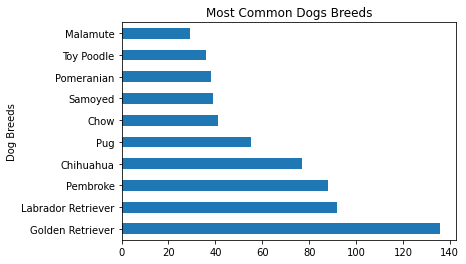

In [142]:
df_dogs.dog_breed.value_counts().sort_values(ascending=False).head(10).plot(kind='barh',title='Most Common Dogs Breeds',xlabel = 'Dog Breeds');

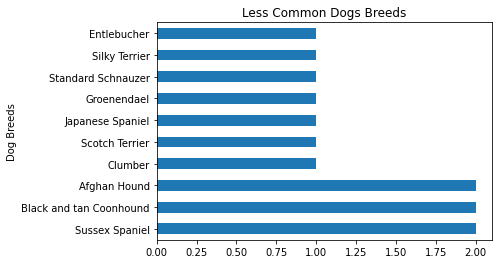

In [143]:
df_dogs.dog_breed.value_counts().sort_values(ascending=False).tail(10).plot(kind='barh',title='Less Common Dogs Breeds',xlabel = 'Dog Breeds');

**The golden retriver is the most appeared dog breed on the page with 136 tweets, while several dog breeds appeared in just one tweet.**

In [144]:
# Most dog stage labeled in tweets
df_dogs.dog_stage.value_counts().sort_values(ascending=False)

pupper     149
doggo       50
puppo       20
floofer      8
Name: dog_stage, dtype: int64

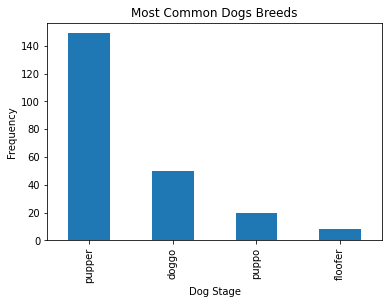

In [145]:
df_dogs.dog_stage.value_counts().sort_values(ascending=False).plot(kind='bar',title='Most Common Dogs Breeds',xlabel = 'Dog Stage',ylabel='Frequency');

**The most featured dog stage is the pupper  with 149 tweets, doggo with 50, then puppo and floofer with 20 and 8 respectively.**

In [146]:
# number of breeds featured by the dog stage

df_dogs.groupby('dog_stage')['dog_breed'].value_counts()['doggo'].head(5)

dog_breed
Golden Retriever      11
Labrador Retriever     5
German Shepherd        3
Bedlington Terrier     2
Cocker Spaniel         2
Name: dog_breed, dtype: int64

In [147]:
df_dogs.groupby('dog_stage')['dog_breed'].value_counts()['pupper'].head(5)

dog_breed
Golden Retriever      18
Pembroke              10
Labrador Retriever     8
Pug                    8
Chihuahua              6
Name: dog_breed, dtype: int64

In [148]:
df_dogs.groupby('dog_stage')['dog_breed'].value_counts()['puppo'].head(5)

dog_breed
Eskimo Dog                        3
Golden Retriever                  2
Labrador Retriever                2
Airedale                          1
American Staffordshire Terrier    1
Name: dog_breed, dtype: int64

In [149]:
df_dogs.groupby('dog_stage')['dog_breed'].value_counts()['floofer'].head(5)

dog_breed
Samoyed             2
Chow                1
English Springer    1
Golden Retriever    1
Lhasa               1
Name: dog_breed, dtype: int64

**The most dog breed labeled as puppo and doggo is the Golden retrierver. The Eskimo Dog and Samoyed are most dogs labeled as puppo and floofer respectively.**

## Insight 3: The ratings and popularity of the dog breeds and stages

In [150]:
#calculate the average of ratings and retweets for each breed of dogs
mean_rating = df_dogs.rating_numerator.mean()
mean_retweet = df_dogs.retweet_count.mean()


In [151]:
#create a dataframe with the ratings, retweets and likes averages for each breed
df_ratings = df_dogs.groupby('dog_breed')['rating_numerator','retweet_count','like_count'].mean()
df_ratings['dog_breed'] = df_ratings.index

<ipython-input-151-6d3591164ff6>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [152]:
# create a scatter plot to visualize the ratings and popularity of each breed
fig = px.scatter(df_ratings,
                  x="rating_numerator", 
                  y="retweet_count", 
                  color="dog_breed",
                 size='like_count', hover_data=['rating_numerator'],labels ={"retweet_count": "Retweets Count","rating_numerator": "Rating"},
                 title='The Ditribution of the Dog Breeds Based on the Ratings Given by the Page and the Retweets and Favorites Received by the Users')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= mean_rating, x1= mean_rating
    ),
            dict(
                type="line",
                yref= 'y', y0= mean_retweet, y1= mean_retweet,
      xref= 'x', x0= 15, x1= 1
                )
])
fig.show()

**The above scatter gives an idea about four groups of dog breeds rated on the page. The size of the dots is related to the average favorites count for each breed.**

**First, the top right quadrant includes the dogs with ratings (given by the page) and retweets count above average. The most rated and popular dog breed is the Afghan Hound. Other dogs breeds in this quadrant are the Saluki (which has the highest favorites of all breeds), Eskimo Dog, English Springer, Tibetan Mastiff....**

**Second, the left bottom quadrant includes the lowest rated and popular dogs breed (under average). The Japanese Spaniel is the worst rated and popular dog in this quadrant. Other dogs in this category are the Barbancon Griffon (lowest like dog breed), Ibizian Hound, Maltese Dog...**

**Third, The top left quadrant is the underrated quadrant that includes the most popular dogs in terms of retweets with an under average rating. The most underrated breed is the standard Poodle  which has the second most retweets in average but has a rating of 10 compared to the average of 11. Other breeds in this category are the Lakeland Terrier, Black and tan Coonhound, and Mexican Hairless.** 

**Fourth, The bottom righ quadrant is the overrated quadrant that includes the less popular dogs in terms of retweets with an above average rating. The most overrrated is the Standard Schnauzer breed. Other breeds in this category are the Silky Terrier, Siberian Husky.**

**Although more sophisticated analysis is needed - that could inlcudes number of dog breeds in each picture, the number of times a breed is rated -, the tweets about the breeds in the top part of the graph shown above are the most likely to increase the engagement of the users on the page.**

### The same analysis can be conducted on the dog stages 

In [153]:
#create a datframe with the average of the ratings, retweets and likes grouped by the dog stage if doggo, pupper, floofer or puppo
df_ratings_stages = df_dogs.groupby('dog_stage')['rating_numerator','retweet_count','like_count'].mean()
df_ratings_stages['dog_stage'] = df_ratings_stages.index
fig = px.scatter(df_ratings_stages, x="rating_numerator", y="retweet_count", color="dog_stage",
                 size='like_count', hover_data=['rating_numerator'],labels ={"retweet_count": "Retweets Count","rating_numerator": "Rating"},
                 title='The Ditribution of the Dog Stages Based on the Ratings Given by the Page and the Retweets and Favorites Received by the Users')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= mean_rating, x1= mean_rating
    ),
            dict(
                type="line",
                yref= 'y', y0= mean_retweet, y1= mean_retweet,
      xref= 'x', x0= 15, x1= 1
                )
])
fig.show()

<ipython-input-153-13afa459a30a>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.




**The most rated (by the page) and liked by the users is the puppo stage. The most retweeted is the doggo stage and second in ratings and likes. The lowest rated, shared, and liked is the pupper even it is the most posted dog stage. This can give an idea about what attracts the users the most and with more analysis, this can leads to used the word puppo instead of the pupper specially these dog stage are similiar and confusing.** 

## Insight 4: Most retweeted dogs in each dog stage

In [154]:
bystage = df_dogs.groupby(['dog_stage','dog_breed'])['retweet_count'].mean()
df_by_stage = bystage.to_frame()
df_by_stage.loc['doggo'].sort_values('retweet_count',ascending=False).head(5)
df_by_stage = df_by_stage.reset_index()
df_by_stage = df_by_stage.sort_values('retweet_count',ascending=False)


In [155]:
fig1 = px.bar(df_by_stage, x="retweet_count", y="dog_breed", facet_col="dog_stage",orientation='h', title="The Retweets Count for Each Dog Breed by Dog Stage")

fig1.show()

**In the tweets where the dogs are classified as doggo, the most retweeted dog breed is the Eskimo Dog, while this dog breed was not retweeted as much in others dog stage (this could be because it was featured in one tweet as doggo).**

**The Lakeland Terrier is the most retweeted dog as puppo, while Samoyed and French Bulldog are the most retweeted among floofers and puppers**

**It is very important to note that this is a simple analysis and is not very signficant to conclude the most popular breeds at each stage, as many of the breed are posted just one time in a stage, while others are posted multiple times.**